In [7]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (2).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [9]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv


In [13]:
import pandas as pd
d1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015 (2).csv')
d2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
d3 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print("First few rows of d1:")
print(d1.head())
print("\nFirst few rows of d2:")
print(d2.head())
print("\nFirst few rows of d3:")
print(d3.head())

First few rows of d1:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import os


from google.colab import drive
drive.mount('/content/drive')


In [14]:
cdc_df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
output_dir = '/content/drive/MyDrive/DAToutput'
os.makedirs(output_dir, exist_ok=True)
cdc_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


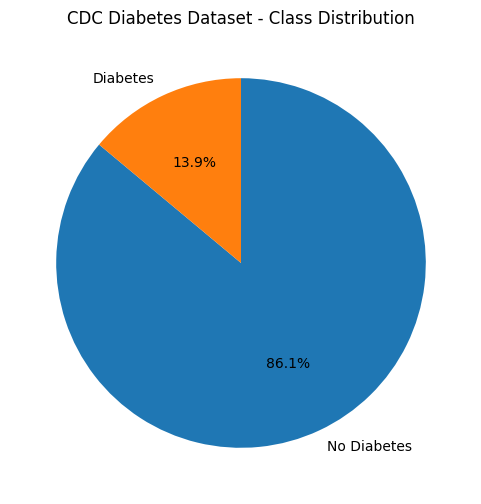

In [21]:
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('CDC Diabetes Dataset - Class Distribution')

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()


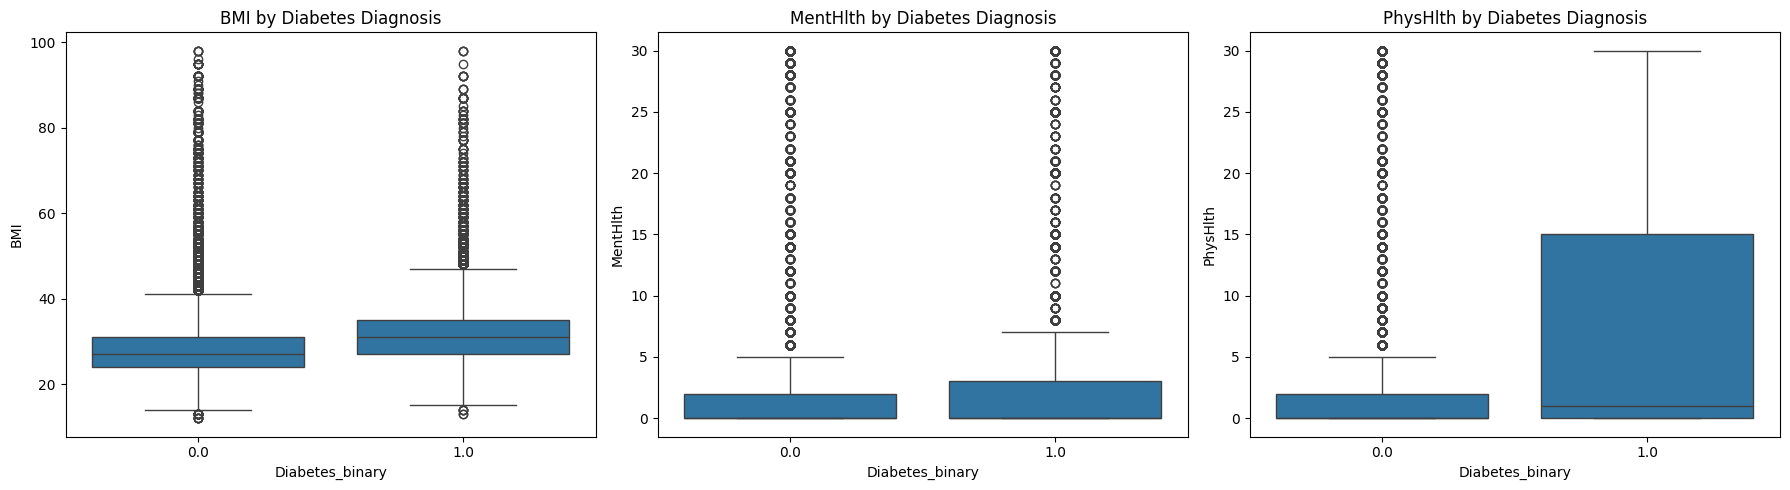

In [22]:
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

features_to_plot = ['BMI', 'MentHlth', 'PhysHlth']
plt.figure(figsize=(18, 5))
for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, idx)
    sns.boxplot(x='Diabetes_binary', y=feature, data=cdc_df)
    plt.title(f'{feature} by Diabetes Diagnosis')
    plt.tight_layout()

plt.savefig(f"{cdc_folder}/cdc_boxplots_key_features.png")
plt.show()


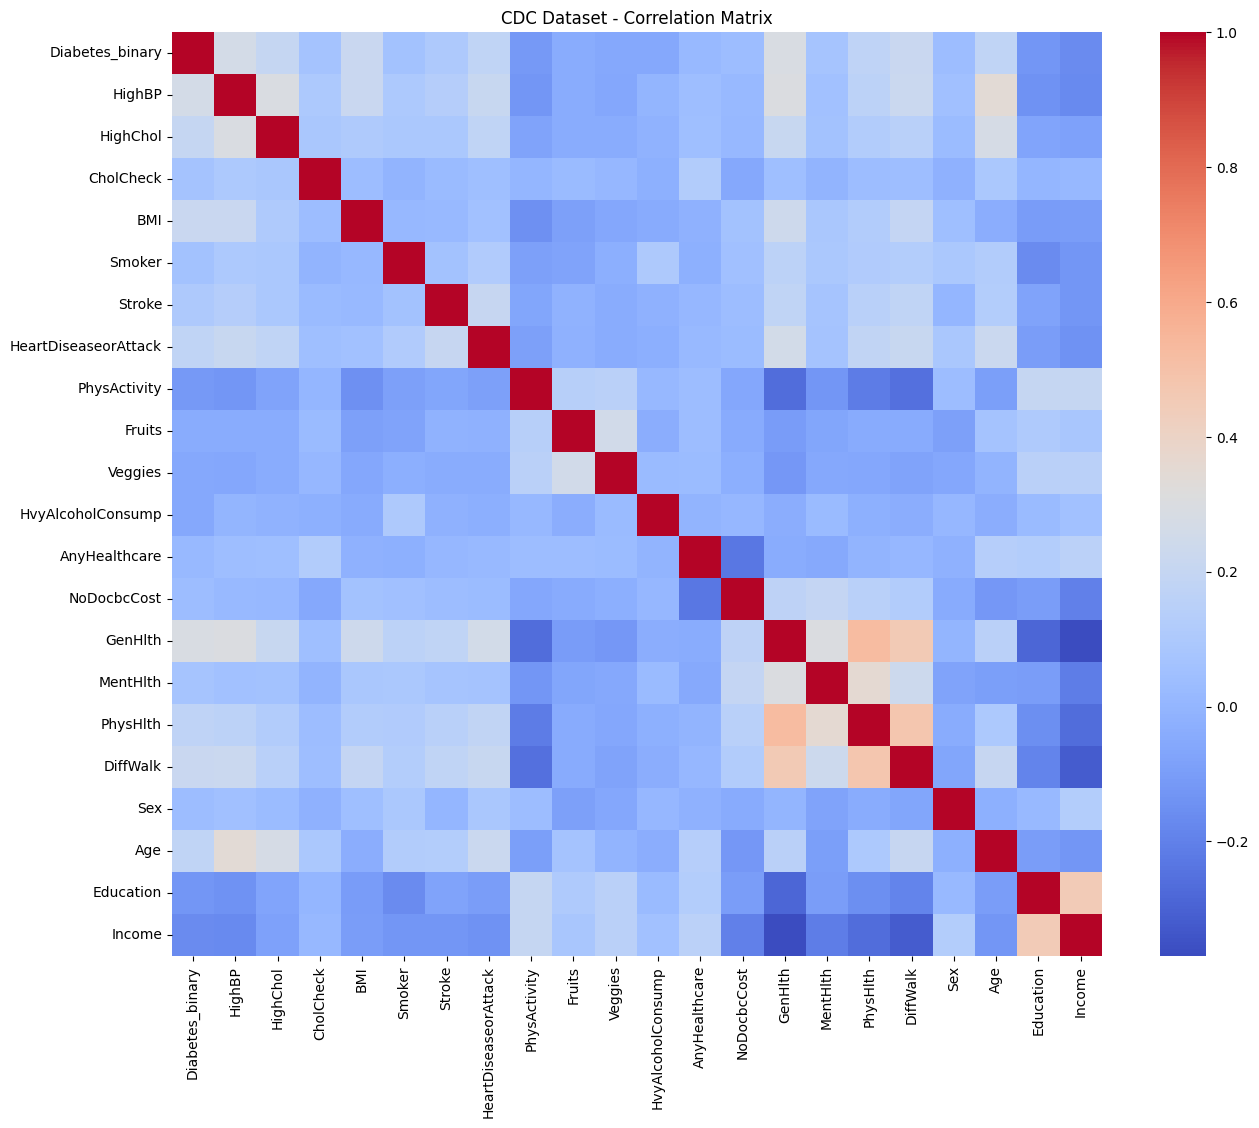

In [23]:
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

numeric_cols = cdc_df.select_dtypes(include='number')

plt.figure(figsize=(15, 12))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('CDC Dataset - Correlation Matrix')

plt.savefig(f"{cdc_folder}/cdc_correlation_matrix.png")
plt.show()


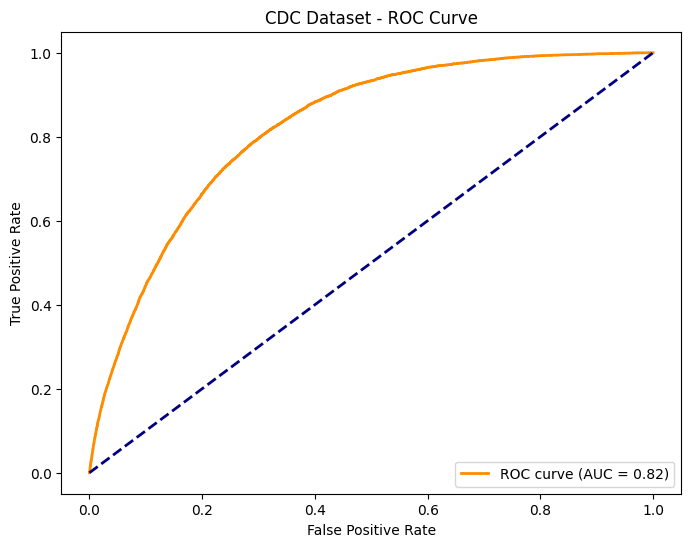

In [24]:
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

X = cdc_df.drop('Diabetes_binary', axis=1)
y = cdc_df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CDC Dataset - ROC Curve')
plt.legend(loc='lower right')

plt.savefig(f"{cdc_folder}/cdc_roc_curve.png")
plt.show()

